In [15]:
# import packages

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from torch import distributions as D
import random

In [16]:
# define functions for shuffling data, generating Gaussian mixtures of fixed dimensionality and modality, generating bimodal Gaussian mixtures
# of fixed asymmetry, and visualizing generated data

def shuffler(array):
    mask = np.arange(len(array))
    random.shuffle(mask)
    return array[mask]

def generate_data(dimension, number_gaussians, amount, asymmetric=False, skewed=False):
    
    if asymmetric:
        mix = D.Categorical(torch.rand(number_gaussians,))
    else:
        mix = D.Categorical(torch.ones(number_gaussians,))

    if skewed:
        comp = D.Independent(D.Normal(torch.randn(number_gaussians, dimension), torch.rand(number_gaussians, dimension)), 1)
    else:
        comp = D.Independent(D.Normal(torch.randn(number_gaussians, dimension), torch.ones(number_gaussians, dimension)), 1)
        
    gmm = D.MixtureSameFamily(mix, comp)
    
    samples = gmm.sample([amount])
    samples_np = samples.numpy()
    
    return samples_np

def generate_asym_data(dimension, ratio, total, skewed=False):
    
    train_np_1_base = generate_data(dimension, 1, amount)
    train_np_2_base = generate_data(dimension, 1, amount)

    train_np_1 = train_np_1_base[:int(ratio*total)]
    train_np_2 = train_np_2_base[:int((1-ratio)*total)]

    train_np = shuffler(np.vstack((train_np_1, train_np_2)))

    return train_np

def FE_hist(data, bounds, binw=0.1, binner=None):

    if binner is None:
        binner = (np.arange(bounds[0], bounds[1] + binw, binw),
                    np.arange(bounds[2], bounds[3] + binw, binw))

    counts, xedges, yedges = np.histogram2d(data[:,0], data[:,1],
                                           bins=binner, density=True)
    prob = counts + 1e-3
    G = -np.log(prob)
    G[G == np.inf] = -1
    G[G == -1] = max(G.ravel())
    G -= min(G.ravel())
    return G, xedges, yedges

In [17]:
# generate a Gaussian mixture with the specified characteristics, fit and transform PCA for visualization

bounds = np.array([-12, 12, -12, 12])
dimension = 50
modes = 2
amount = 100000
train_np = generate_data(dimension, modes, amount)
pca = PCA(n_components=2)
trainingpca = pca.fit_transform(train_np)

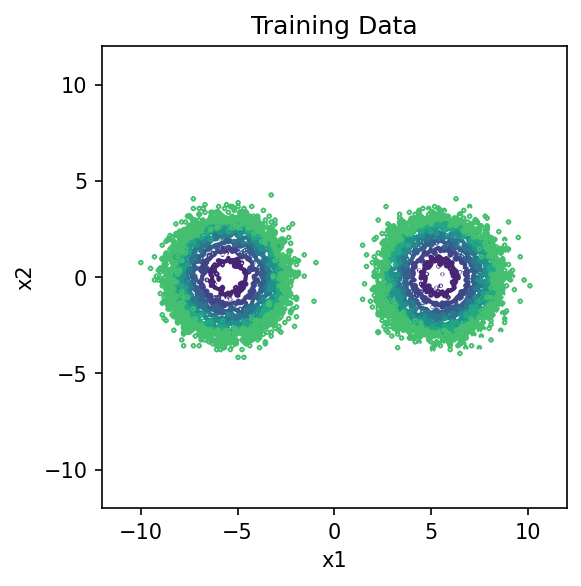

In [18]:
# visualize Gaussian mixture generated data

G_MD, xe_MD, ye_MD = FE_hist(trainingpca, bounds, binw=0.1)

fig = plt.figure(figsize=(4,4), dpi=150)
axs = plt.axes()
axs.contour(G_MD.T, extent=[xe_MD[0], xe_MD[-1], ye_MD[0], ye_MD[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs.set_xlabel("x1")
axs.set_ylabel("x2")
axs.set_title("Training Data")
axs.set_xlim(bounds[0], bounds[1]);
axs.set_ylim(bounds[2], bounds[3]);

In [19]:
# save Gaussian mixture to data_input
# if data_accessor ran successfully, the files needed for experiments already exist and this step is unnecessary

save_destination = f"data_input/gmm_dim_{dimension}_modes_{modes}"
np.save(save_destination, train_np)

In [20]:
# generate an asymmetric Gaussian mixture with the specified characteristics, fit and transform PCA for visualization

bounds = np.array([-12, 12, -12, 12])
dimension = 50
asym_range = np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.1, 0.15, 0.25, 0.35, 0.5])
desired_asym_index = 2
amount = 100000
train_np = generate_asym_data(dimension, asym_range[desired_asym_index], amount)
pca = PCA(n_components=2)
trainingpca = pca.fit_transform(train_np)

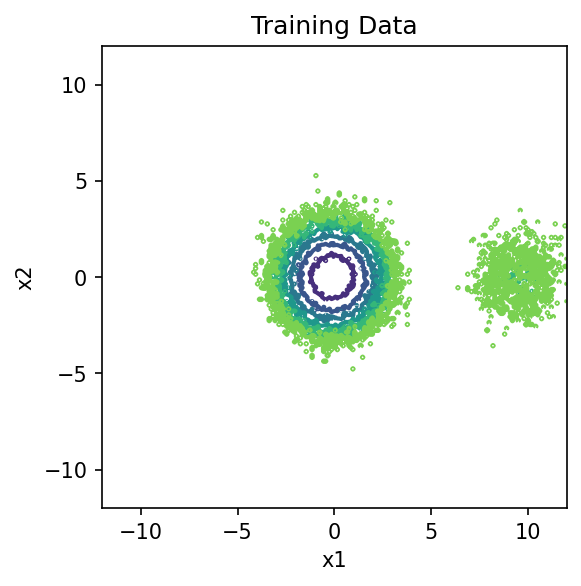

In [21]:
# visualize asymmetric Gaussian mixture generated data

G_MD, xe_MD, ye_MD = FE_hist(trainingpca, bounds, binw=0.1)

fig = plt.figure(figsize=(4,4), dpi=150)
axs = plt.axes()
axs.contour(G_MD.T, extent=[xe_MD[0], xe_MD[-1], ye_MD[0], ye_MD[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs.set_xlabel("x1")
axs.set_ylabel("x2")
axs.set_title("Training Data")
axs.set_xlim(bounds[0], bounds[1]);
axs.set_ylim(bounds[2], bounds[3]);

In [22]:
# save asymmetric Gaussian mixture to data_input
# if data_accessor ran successfully, the files needed for experiments already exist and this step is unnecessary

save_destination = f"data_input/gmm_dim_{dimension}_modes_2_asym_{asym_range[desired_asym_index]}"
np.save(save_destination, train_np)